In [74]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
def winning_door():
    return random.choice([1, 2, 3])

def select_door():
    return random.choice([1, 2, 3])

def get_other_door(door_1, door_2):
    options = [1, 2, 3]
    if door_1 == door_2:
        options = [i for i in options if i != door_1]
        return random.choice(options)
    else:
        chosens = [door_1, door_2]
        return np.setdiff1d(options,chosens)

In [68]:
def simulate_monty_hall(strategy):    
    win_location = winning_door()
    selection = select_door()
    
    if strategy == True:
        revealed_door = get_other_door(win_location, selection)
        selection = get_other_door(selection, revealed_door)[0]

    if win_location == selection:
        return 1
    else: 
        return 0

In [87]:
results_change_doors = []
results_keep_door = []
differences = []
for i in range(0, 1000):
    results_change_doors.append(simulate_monty_hall(True))
    results_keep_door.append(simulate_monty_hall(False))
    if i == 0:
        differences.append(0 + results_keep_door[i] - results_change_doors[i])
    else:
        differences.append(differences[i - 1] + (results_keep_door[i] - results_change_doors[i]))
    
results = pd.DataFrame(columns=['change_door', 'keep_door'])
results['change_door'] = results_change_doors
results['keep_door'] = results_keep_door

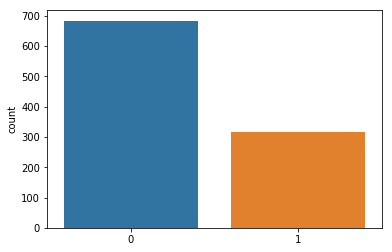

In [78]:
sns.countplot(results_keep_door)

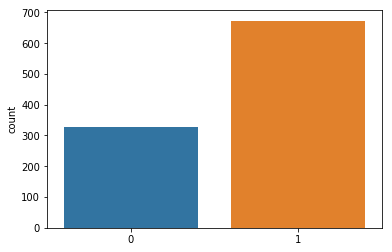

In [77]:
sns.countplot(results_change_doors)

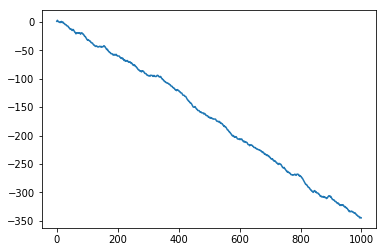

In [92]:
sns.lineplot(x=range(0, 1000), y=differences)

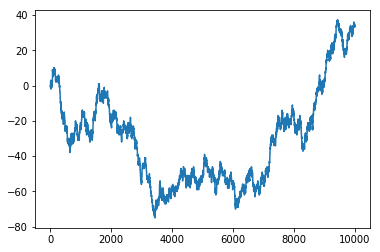

In [94]:
results_change_doors = []
results_keep_door = []
differences = []
for i in range(0, 10000):
    results_change_doors.append(simulate_monty_hall(False))
    results_keep_door.append(simulate_monty_hall(False))
    if i == 0:
        differences.append(0 + results_keep_door[i] - results_change_doors[i])
    else:
        differences.append(differences[i - 1] + (results_keep_door[i] - results_change_doors[i]))

sns.lineplot(x=range(0, 10000), y=differences)